In [53]:
#pip install xgboost For Installing XGBoost
#pip install 

In [54]:
import pandas as pd
import numpy as np
import time
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV #for hyper parameter Tuning

import math


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #needed for spliting data into testing and training
from sklearn.preprocessing import StandardScaler
#from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error #For calculating MSE

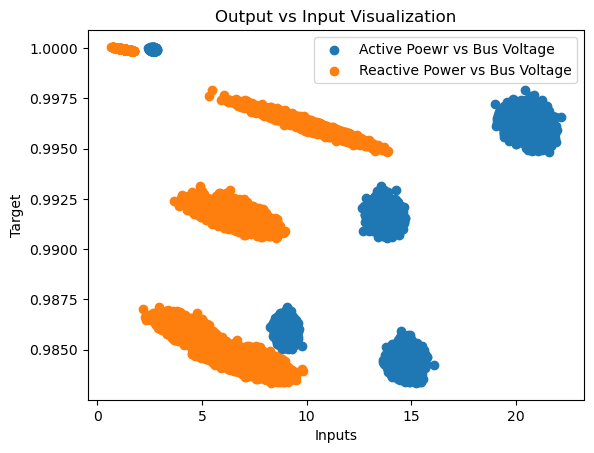

In [55]:
df=pd.read_csv(r'D:\Notebook\Data_for_ML.csv') #Input and target data
df.drop(columns = "Unnamed: 0",inplace=True)
data=np.array(df)
X=data[:,2:4]
y=data[:,4]


# Scatter plot of the inputs vs target
plt.scatter(X[:, 0], y, label='Active Poewr vs Bus Voltage')
plt.scatter(X[:, 1], y, label='Reactive Power vs Bus Voltage')
plt.xlabel('Inputs')
plt.ylabel('Target')
plt.legend()
plt.title('Output vs Input Visualization')
plt.savefig("Output vs Input Regression Model.svg", format='svg')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
#print("Train data are:")
#print(X_train)
#print(y_train)

#Normalizing the Input
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)







In [56]:
# LR Model
t = time.process_time() 
lr = LinearRegression().fit(X_train_scaled, y_train) #for MLR
training_time = time.process_time() - t
print(f"Training Time: {training_time}") 
#print(f"Training Time: {training_time / 60} seconds")  # Training Time in Minutes


#Training RMSE
mse = mean_squared_error(y_train, lr.predict(X_train_scaled))
print("Training MSE: %.5f" % mse)
print("Training RMSE: %.5f" % math.sqrt(mse))


#Training MAPE
mape_train = np.mean(np.abs((y_train - lr.predict(X_train_scaled)) / y_train)) * 100
print(f"Training MAPE: {mape_train:.5f}%")

y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

print("Actual Values are:")
print(y_test)

print("Predicted Values are:")
print(y_pred)


# Testing Time
start_time_test = time.process_time()
y_pred = lr.predict(X_test_scaled)  # Make predictions on the test set
testing_time = time.process_time() - start_time_test
print(f"Testing Time: {testing_time:.5f} seconds")

# Testing RMSE
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = math.sqrt(mse_test)
print(f"Testing RMSE: {rmse_test:.5f}")

# Testing MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Testing MAPE: {mape_test:.5f}%")




Training Time: 0.0
Training MSE: 0.00003
Training RMSE: 0.00575
Training MAPE: 0.52571%
Actual Values are:
[0.991652 0.995677 0.996133 ... 0.999946 0.999932 0.996993]
Predicted Values are:
[0.99128884 0.98895706 0.98944422 ... 0.99382562 0.99379831 0.99044282]
Testing Time: 0.00000 seconds
Testing RMSE: 0.00575
Testing MAPE: 0.52598%


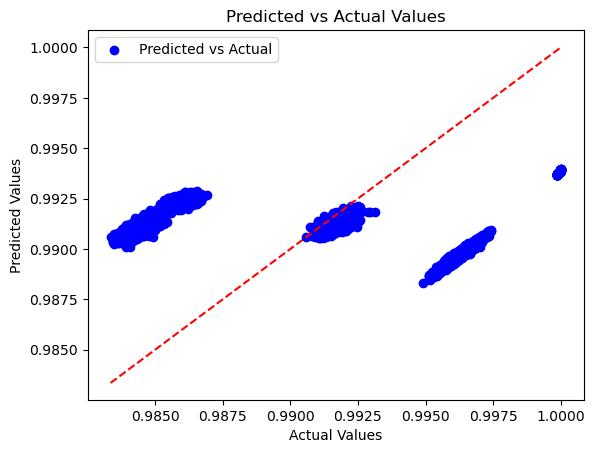

In [57]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.savefig("Linear Regression Model.svg", format='svg')
plt.show()

In [58]:
#SVM Model
t = time.process_time() 
lr = SVR().fit(X_train_scaled, y_train) #for MLR
training_time = time.process_time() - t
print(f"Training Time: {training_time}") 
#print(f"Training Time: {training_time / 60} seconds")  # Training Time in Minutes


#Training RMSE
mse = mean_squared_error(y_train, lr.predict(X_train_scaled))
print("Training MSE: %.5f" % mse)
print("Training RMSE: %.5f" % math.sqrt(mse))


#Training MAPE
mape_train = np.mean(np.abs((y_train - lr.predict(X_train_scaled)) / y_train)) * 100
print(f"Training MAPE: {mape_train:.5f}%")

y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

print("Predicted Values are:")
#print(y_pred)


# Testing Time
start_time_test = time.process_time()
y_pred = lr.predict(X_test_scaled)  # Make predictions on the test set
testing_time = time.process_time() - start_time_test
print(f"Testing Time: {testing_time:.5f} seconds")

# Testing RMSE
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = math.sqrt(mse_test)
print(f"Testing RMSE: {rmse_test:.5f}")

# Testing MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Testing MAPE: {mape_test:.5f}%")




Training Time: 0.015625
Training MSE: 0.00004
Training RMSE: 0.00592
Training MAPE: 0.52589%
Predicted Values are:
Testing Time: 0.00000 seconds
Testing RMSE: 0.00590
Testing MAPE: 0.52374%


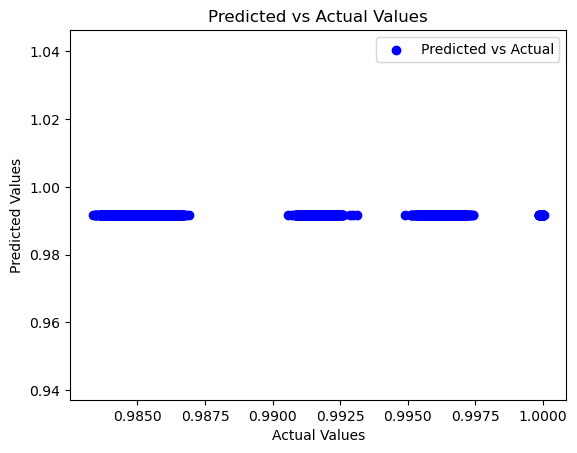

In [59]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.savefig("SVM Model Model.svg", format='svg')
plt.show()


In [60]:
#Decison Tree
t = time.process_time() 
lr = tree.DecisionTreeRegressor().fit(X_train_scaled, y_train) #for MLR
training_time = time.process_time() - t
print(f"Training Time: {training_time}") 
#print(f"Training Time: {training_time / 60} seconds")  # Training Time in Minutes


#Training RMSE
mse = mean_squared_error(y_train, lr.predict(X_train_scaled))
print("Training MSE: %.5f" % mse)
print("Training RMSE: %.5f" % math.sqrt(mse))


#Training MAPE
mape_train = np.mean(np.abs((y_train - lr.predict(X_train_scaled)) / y_train)) * 100
print(f"Training MAPE: {mape_train:.5f}%")

y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

print("Predicted Values are:")
#print(y_pred)


# Testing Time
start_time_test = time.process_time()
y_pred = lr.predict(X_test_scaled)  # Make predictions on the test set
testing_time = time.process_time() - start_time_test
print(f"Testing Time: {testing_time:.5f} seconds")

# Testing RMSE
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = math.sqrt(mse_test)
print(f"Testing RMSE: {rmse_test:.5f}")

# Testing MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Testing MAPE: {mape_test:.5f}%")


Training Time: 0.625
Training MSE: 0.00000
Training RMSE: 0.00000
Training MAPE: 0.00000%
Predicted Values are:
Testing Time: 0.00000 seconds
Testing RMSE: 0.00104
Testing MAPE: 0.03179%


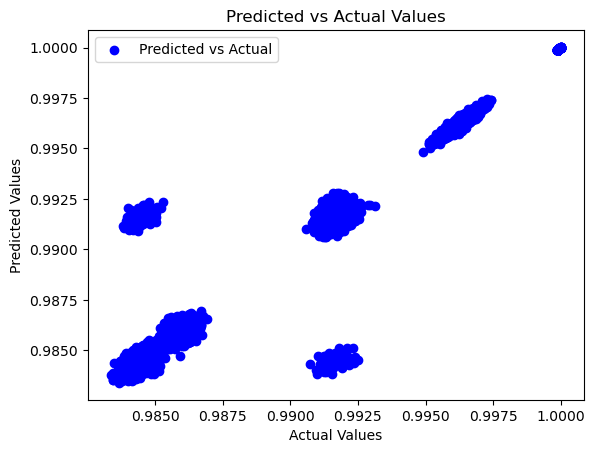

In [61]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.savefig("Decison Tree Model.svg", format='svg')
plt.show()


In [62]:


#ANN
t = time.process_time() 
lr = MLPRegressor().fit(X_train_scaled, y_train) #for MLR
training_time = time.process_time() - t
print(f"Training Time: {training_time}") 
#print(f"Training Time: {training_time / 60} seconds")  # Training Time in Minutes


#Training RMSE
mse = mean_squared_error(y_train, lr.predict(X_train_scaled))
print("Training MSE: %.5f" % mse)
print("Training RMSE: %.5f" % math.sqrt(mse))


#Training MAPE
mape_train = np.mean(np.abs((y_train - lr.predict(X_train_scaled)) / y_train)) * 100
print(f"Training MAPE: {mape_train:.5f}%")

y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

print("Predicted Values are:")
#print(y_pred)


# Testing Time
start_time_test = time.process_time()
y_pred = lr.predict(X_test_scaled)  # Make predictions on the test set
testing_time = time.process_time() - start_time_test
print(f"Testing Time: {testing_time:.5f} seconds")

# Testing RMSE
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = math.sqrt(mse_test)
print(f"Testing RMSE: {rmse_test:.5f}")

# Testing MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Testing MAPE: {mape_test:.5f}%")


Training Time: 2.0
Training MSE: 0.00000
Training RMSE: 0.00223
Training MAPE: 0.15872%
Predicted Values are:
Testing Time: 0.00000 seconds
Testing RMSE: 0.00225
Testing MAPE: 0.16025%


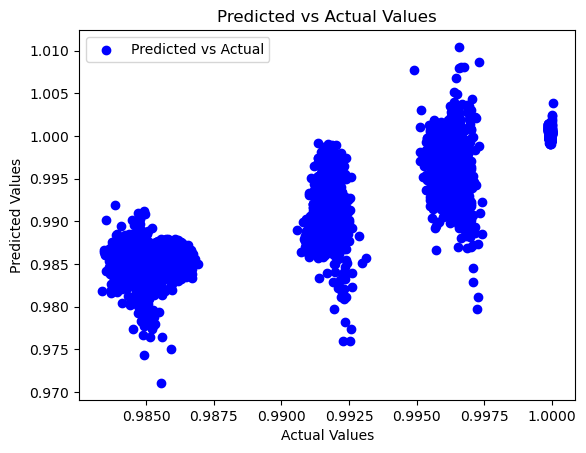

In [63]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.savefig("ANN Model.svg", format='svg')
plt.show()


In [64]:
#Random Forest 
t = time.process_time() 
lr = RandomForestRegressor().fit(X_train_scaled, y_train) #for MLR
training_time = time.process_time() - t
print(f"Training Time: {training_time}") 
#print(f"Training Time: {training_time / 60} seconds")  # Training Time in Minutes


#Training RMSE
mse = mean_squared_error(y_train, lr.predict(X_train_scaled))
print("Training MSE: %.5f" % mse)
print("Training RMSE: %.5f" % math.sqrt(mse))


#Training MAPE
mape_train = np.mean(np.abs((y_train - lr.predict(X_train_scaled)) / y_train)) * 100
print(f"Training MAPE: {mape_train:.5f}%")

y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

print("Predicted Values are:")
#print(y_pred)


# Testing Time
start_time_test = time.process_time()
y_pred = lr.predict(X_test_scaled)  # Make predictions on the test set
testing_time = time.process_time() - start_time_test
print(f"Testing Time: {testing_time:.5f} seconds")

# Testing RMSE
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = math.sqrt(mse_test)
print(f"Testing RMSE: {rmse_test:.5f}")

# Testing MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Testing MAPE: {mape_test:.5f}%")


Training Time: 34.03125
Training MSE: 0.00000
Training RMSE: 0.00031
Training MAPE: 0.01025%
Predicted Values are:
Testing Time: 0.31250 seconds
Testing RMSE: 0.00083
Testing MAPE: 0.02782%


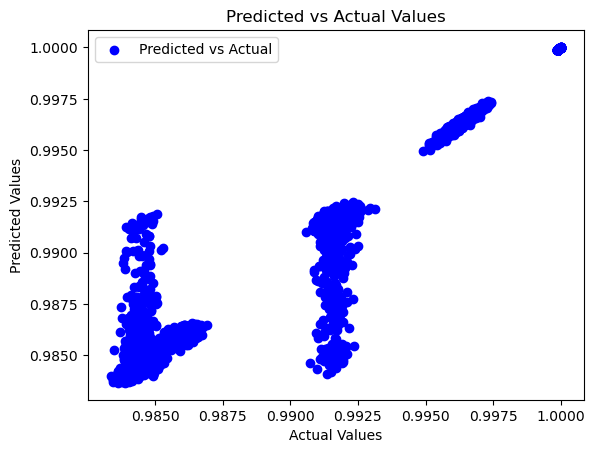

In [65]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.savefig("Random Forest Model.svg", format='svg')
plt.show()


In [66]:
#Xtreme Gradient Boost
t = time.process_time() 
lr = XGBRegressor().fit(X_train_scaled, y_train) #for MLR
training_time = time.process_time() - t
print(f"Training Time: {training_time}") 
#print(f"Training Time: {training_time / 60} seconds")  # Training Time in Minutes


#Training RMSE
mse = mean_squared_error(y_train, lr.predict(X_train_scaled))
print("Training MSE: %.5f" % mse)
print("Training RMSE: %.5f" % math.sqrt(mse))


#Training MAPE
mape_train = np.mean(np.abs((y_train - lr.predict(X_train_scaled)) / y_train)) * 100
print(f"Training MAPE: {mape_train:.5f}%")

y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

print("Predicted Values are:")
#print(y_pred)


# Testing Time
start_time_test = time.process_time()
y_pred = lr.predict(X_test_scaled)  # Make predictions on the test set
testing_time = time.process_time() - start_time_test
print(f"Testing Time: {testing_time:.5f} seconds")

# Testing RMSE
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = math.sqrt(mse_test)
print(f"Testing RMSE: {rmse_test:.5f}")

# Testing MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Testing MAPE: {mape_test:.5f}%")

Training Time: 0.546875
Training MSE: 0.00000
Training RMSE: 0.00076
Training MAPE: 0.02643%
Predicted Values are:
Testing Time: 0.03125 seconds
Testing RMSE: 0.00080
Testing MAPE: 0.02743%


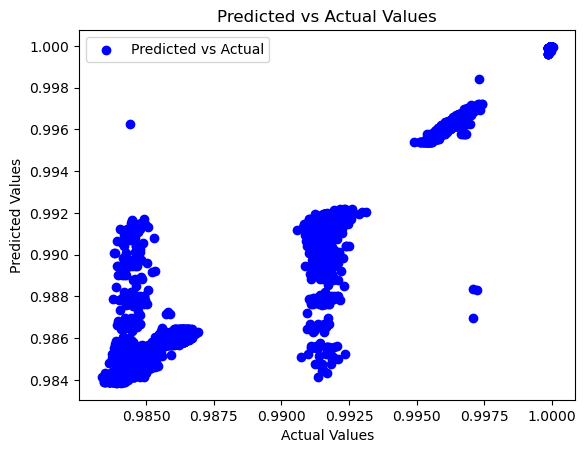

In [67]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.savefig("Xtreme Gradient Boost Model.svg", format='svg')
plt.show()


In [68]:


# Create a tuning grid of different hyperparameter values
param_grid = {
    'min_samples_leaf': [25, 50, 75, 100, 200, 300],
    'min_impurity_decrease': [0.0, 0.001, 0.005, 0.01, 0.015, 0.02]
}

# Instantiate a regressor
regressor = DecisionTreeRegressor(random_state=12345)

# Instantiate 10-fold CV repeated 10 times
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=54321)

# Instantiate grid search CV
grid_cv = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', n_jobs=5, cv=cv, refit=True)

# Perform grid search
grid_cv.fit(X_train_scaled, y_train)

# Which parameters were the best?
print(grid_cv.best_params_)


{'min_impurity_decrease': 0.0, 'min_samples_leaf': 200}
